# 1.Importing all libraries for the project

In [1]:
#Importing libraries which are useful for project
import pandas as pd # imports the library the current namespace 'pd' for data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # import the entire numpy module with a short name np
# Below libraries are used for Input data files are available in the "../input/" directory.
import os # Importing this module provides a portable way of using operating system
import matplotlib.pyplot as plt# importing matplotlib means collection of functions used for visualization
from PIL import  Image # this function loads an image 
%matplotlib inline
import pandas as pd
import seaborn as sns#Seaborn is a data visualization library in Python based on matplotlib
import itertools # provides various functions that work on iterators to produce complex iterators
import warnings #this function is used to alert the user
warnings.filterwarnings("ignore")
import io # this module is used for stream handling
import plotly.offline as py#Plotly allows you to generate visualization graphs offline and save them in local machine
py.init_notebook_mode(connected=True)#visualization also to check an internet connection for the notebook to work
import plotly.graph_objs as go#visualization tool to creating elaborate plots more efficiently
import plotly.tools as tls#used in data visualization
import plotly.figure_factory as ff#imported for visualization

# 2.Importing dataset into the kernal

In [2]:
## Loading the excel file into a DataFrame

telecomdata = pd.read_csv("FindingChurn.csv") #pandas librabies used to read csv file
#first few rows
telecomdata.head() # Data loading to kernal

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## 3.Data overview
* Briefing about number of columns, features and unique values.

In [3]:
## Exploring the Data
print ("Rows     : " , telecomdata.shape[0])
print ("Columns  : " , telecomdata.shape[1])
print ("\nFeatures : \n" , telecomdata.columns.tolist())
print ("\nMissing values :  ", telecomdata.isnull().sum().values.sum())
print ("\nUnique values :  \n", telecomdata.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## 4.Data Manipulation
* The process of data transformation, formatting & structuring the dataset which is used for exploratory data analysis.

In [4]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telecomdata['TotalCharges'] = telecomdata["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contains missing data 
telecomdata = telecomdata[telecomdata["TotalCharges"].notnull()]
telecomdata = telecomdata.reset_index()[telecomdata.columns]

#convert to float type
telecomdata["TotalCharges"] = telecomdata["TotalCharges"].astype(float)

#replace No for the following varibles which contain 'No internet service'
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telecomdata[i]  = telecomdata[i].replace({'No internet service' : 'No'})
    
#replace values
telecomdata["SeniorCitizen"] = telecomdata["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
#Binning Telecom Data into multiple binds 
def tenurelab(telecomdata) :
    
    if telecomdata["tenure"] <= 12 :
        return "Tenure0-12"
    elif (telecomdata["tenure"] > 12) & (telecomdata["tenure"] <= 24 ):
        return "Tenure12-24"
    elif (telecomdata["tenure"] > 24) & (telecomdata["tenure"] <= 48) :
        return "Tenure24-48"
    elif (telecomdata["tenure"] > 48) & (telecomdata["tenure"] <= 60) :
        return "Tenure48-60"
    elif telecomdata["tenure"] > 60 :
        return "Tenuregrter_60"
telecomdata["tenuregroup"] = telecomdata.apply( lambda  telecomdata:tenurelab(telecomdata),
                                      axis = 1)

#Separating churn and non churn customers into two individual Dataframes for further analysis
churn     = telecomdata[telecomdata["Churn"] == "Yes"]
not_churn = telecomdata[telecomdata["Churn"] == "No"]

#Separating catagorical and numerical columns
Id     = ['customerID']
target = ["Churn"]
catcolumns   = telecomdata.nunique()[telecomdata.nunique() < 6].keys().tolist()
catcolumns   = [x for x in catcolumns if x not in target]
numcolumns   = [x for x in telecomdata.columns if x not in catcolumns + target + Id]

## 5.Exploratory Data Analysis

### Customer churn analysis in data
* Identifying customer churn percentage in the dataset.

In [5]:
#labels
labels = telecomdata["Churn"].value_counts().keys().tolist()
#values
values = telecomdata["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = labels ,
               values = values ,
               marker = dict(colors =  [ 'green' ,'yellow'], line = dict(color = "black", width =  1.3)),
               rotation = 90, hoverinfo = "label+value+text",hole = .5)
layout = go.Layout(dict(title = "Percentage of customer churn in the dataset",plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",))

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### churn analysis with respective variables
* Considering each varible, visualizing the impact of churn in it.

In [6]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    T1 = go.Pie(values  = churn[column].value_counts().values.tolist(),labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",domain  = dict(x = [0,.48]), name    = "Customers churn",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)") ), hole    = .6)
    T2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(), labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name", marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),hole    = .6,name    = "customers" )

    layout = go.Layout(dict(title = column + " customer churn distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = " churner in customers",
                                                font = dict(size = 13), showarrow = False,
                                                x = .15, y = .5),  dict(text = "Non churner in customers",
                                                font = dict(size = 13), showarrow = False, x = .88,y = .5)]))
    data = [T1,T2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

#function  for histogram for customer churn types
def histogram(column) : 
    T1 = go.Histogram(x  = churn[column],histnorm= "percent",name = "Churner in Customers",
                          marker = dict(line = dict(width = .5,color = "white")),opacity = .9 )     
    T2 = go.Histogram(x  = not_churn[column],histnorm = "percent", name = "Non churner in customers",
                          marker = dict(line = dict(width = .5,color = "white")), opacity = .9 )
    data = [T1,T2]
    layout = go.Layout(dict(title =column + " churner in customers ",plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,zerolinewidth=1, ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)', title = "percent",zerolinewidth=1,
                                             ticklen=5,gridwidth=2), ))
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "RdBu"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure", values = df["tenure"]),dict(label  = 'MonthlyCharges', values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',values = df['TotalCharges'])],text = text,
                     marker = dict(color = color_vals, colorscale = pl_colorscale,
                                   size = 3,showscale = False,line = dict(width = .1,color='rgb(230,230,230)')))
    axis = dict(showline  = True,zeroline  = False,gridcolor = "#fff",ticklen   = 4)
    
    layout = go.Layout(dict(title  =  "Scatter plot matrix for numerical columns for churn customers",
                            autosize = False,height = 800,width  = 800, dragmode = "select",hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',xaxis1 = dict(axis),yaxis1 = dict(axis),
                            xaxis2 = dict(axis), yaxis2 = dict(axis),xaxis3 = dict(axis), yaxis3 = dict(axis),))
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in catcolumns :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in numcolumns :
    histogram(i)

#scatter plot matrix
scatter_matrix(telecomdata)


### Customer Churn analysis in tenure groups.
* Dividing tenure into multiple groups and checking churn values in it.

In [7]:
#customer churn in tenure groups
tengrpcn  =  churn["tenuregroup"].value_counts().reset_index()
tengrpcn.columns  = ["tenuregroup","count"]
tengrp_ncn =  not_churn["tenuregroup"].value_counts().reset_index()
tengrp_ncn.columns = ["tenuregroup","count"]

#bar - churn
T1 = go.Bar(x = tengrpcn["tenuregroup"]  , y = tengrpcn["count"],name = "Churner in Customers",
                marker = dict(line = dict(width = .5,color = "white")),opacity = .9)
#bar - not churn
T2 = go.Bar(x = tengrp_ncn["tenuregroup"] , y = tengrp_ncn["count"],name = "Non Churner in Customers",
                marker = dict(line = dict(width = .5,color = "white")),opacity = .9)

layout = go.Layout(dict(title = "Customer churn in tenure groups", plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                   title = "tenure group",zerolinewidth=1,ticklen=5,gridwidth=2),
                   yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "count",zerolinewidth=1,ticklen=5,gridwidth=2),))
data = [T1,T2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Monthly charges,total charges and tenure in customer churn
* Plotting 3D graph using Monthly, Total and tenure charges of the customer churn.

In [8]:
##copy data
telecom_df = telecomdata.copy()
#Drop tenure column
telecomdata = telecomdata.drop(columns = "tenuregroup",axis = 1)

trace1 = go.Scatter3d(x = churn["MonthlyCharges"], y = churn["TotalCharges"], z = churn["tenure"],
                      mode = "markers",name = "Churn customers",text = "Id : " + churn["customerID"],
                      marker = dict(size = 1,color = "red"))
trace2 = go.Scatter3d(x = not_churn["MonthlyCharges"],y = not_churn["TotalCharges"],
                      z = not_churn["tenure"],name = "Non churn customers",
                      text = "Id : " + not_churn["customerID"],mode = "markers",
                      marker = dict(size = 1,color= "green"))
layout = go.Layout(dict(title = "3D plot of Monthly charges,total charges & tenure in customer churn",
         scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),center=dict(x=0, y=0, z=0),
         eye=dict(x=1.25, y=1.25, z=1.25)),
                      xaxis  = dict(title = "monthly charges",gridcolor='rgb(255, 255, 255)', 
        zerolinecolor='rgb(255, 255, 255)',showbackground=True,backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = "total charges",gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     zaxis  = dict(title = "tenure", gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)')), height = 700,))
                  
data = [trace1,trace2]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

# 5.Data preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id     = ['customerID']
#Target columns
target = ["Churn"]
#categorical columns
catcolumns   = telecomdata.nunique()[telecomdata.nunique() < 6].keys().tolist()
catcolumns   = [x for x in catcolumns if x not in target]
#numerical columns
numcolumns   = [x for x in telecomdata.columns if x not in catcolumns + target + Id]
#Binary columns with 2 values
binary_columns   = telecomdata.nunique()[telecomdata.nunique() == 2].keys().tolist()
#Columns more than 2 values
multiple_columns = [i for i in catcolumns if i not in binary_columns]

#Label encoding Binary columns
le = LabelEncoder()
for i in binary_columns :
    telecomdata[i] = le.fit_transform(telecomdata[i])
    
#Duplicating columns for multi value columns
telecomdata = pd.get_dummies(data = telecomdata,columns = multiple_columns )

#Scaling Numerical columns
stnd = StandardScaler()
scaled_data = stnd.fit_transform(telecomdata[numcolumns])
scaled_data = pd.DataFrame(scaled_data,columns=numcolumns)

#dropping original values merging scaled values for numerical columns
df_telecomdata_org = telecomdata.copy()
telecomdata = telecomdata.drop(columns = numcolumns,axis = 1)
telecomdata = telecomdata.merge(scaled_data,left_index=True,right_index=True,how = "left")


### Variable Summary
* Finding count, mean, standard Deviation, minimum, percentages and maximum for every variable in the dataset

In [10]:
summaryofvaribles = (df_telecomdata_org[[i for i in df_telecomdata_org.columns if i not in Id]].
           describe().transpose().reset_index())

summaryofvaribles = summaryofvaribles.rename(columns = {"index" : "feature"})
summaryofvaribles = np.around(summaryofvaribles,3)

val_lst = [summaryofvaribles['feature'], summaryofvaribles['count'],summaryofvaribles['mean'],
           summaryofvaribles['std'],summaryofvaribles['min'], summaryofvaribles['25%'],
           summaryofvaribles['50%'], summaryofvaribles['75%'], summaryofvaribles['max']]

trace  = go.Table(header = dict(values = summaryofvaribles.columns.tolist(),
                                line = dict(color = ['#0f5fc5']),
                                fill = dict(color = ['#686a6c']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#119DFF']),
                                fill = dict(color = ["white",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Each Variable Summary in a dataset"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)


### Correlation Matrix of the Telecom dataset

In [11]:
#correlation
correlationofchurndata = telecomdata.corr()
#tick labels
matrixcolumns = correlationofchurndata.columns.tolist()
#convert to array
correlationarray  = np.array(correlationofchurndata)

#Plotting
Trc = go.Heatmap(z = correlationarray,x = matrixcolumns, y = matrixcolumns, colorscale = "magma",
                   colorbar   = dict(title = "Pearson Correlation coefficient of finding churn dataset", titleside = "right") , )

layout = go.Layout(dict(title = "Correlation Matrix for variables in the dataset",autosize = False,height  = 720,
                        width   = 800,margin  = dict(r = 0 ,l = 210,t = 25,b = 210,),
                        yaxis   = dict(tickfont = dict(size = 9)),xaxis   = dict(tickfont = dict(size = 9))))

data = [Trc]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Visualising data with principal components

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

Xdata = telecomdata[[i for i in telecomdata.columns if i not in Id + target]]
Ydata = telecomdata[target + Id]

principalcomponentsanalysis = pca.fit_transform(Xdata)
pcadata = pd.DataFrame(principalcomponentsanalysis,columns = ["PC1","PC2"])
pcadata = pcadata.merge(Ydata,left_index=True,right_index=True,how="left")
pcadata["Churn"] = pcadata["Churn"].replace({1:"Churn",0:"Not Churn"})

def pcascatter(target,color) :
    tracer = go.Scatter(x = pcadata[pcadata["Churn"] == target]["PC1"] ,y = pcadata[pcadata["Churn"] == target]["PC2"],
                        name = target,mode = "markers",marker = dict(color = color,line = dict(width = .5),
                                      symbol =  "square-open"),
                        text = ("Customer Id : " + pcadata[pcadata["Churn"] == target]['customerID']))
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components analysis",plot_bgcolor  = "rgb(243,243,243)",
         paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "principal component 1", 
         zerolinewidth=1,ticklen=5,gridwidth=2),yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "principal component 2",
         zerolinewidth=1,ticklen=5,gridwidth=2),height = 600))
T1 = pcascatter("Churn",'blue')
T2 = pcascatter("Not Churn",'green')
data = [T2,T1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


## 7.Model Building
### Baseline Model_Logistic regression

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1484
           1       0.74      0.54      0.63       626

    accuracy                           0.81      2110
   macro avg       0.78      0.73      0.75      2110
weighted avg       0.80      0.81      0.80      2110

Accuracy   Score :  0.8075829383886256
Area under curve :  0.7311342283613065 



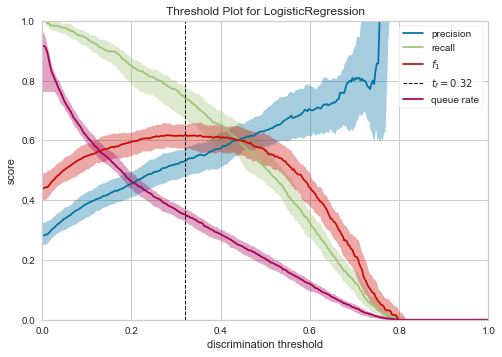

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')
#splitting train and test data 
train,test = train_test_split(telecomdata,test_size = .30 ,random_state = 123)
    
##seperating dependent and independent variables
columns    = [i for i in telecomdata.columns if i not in Id + target]
trainX = train[columns] #training_x    - predictor variables dataframe(training)
trainY = train[target] #training_y    - target variable(training)
testX  = test[columns] #testing_x     - predictor variables dataframe(testing)
testY  = test[target] #testing_y    - target variable(testing)
    
def telecomchurnprediction(algorithm,trainingx,testingx,
                             trainingy,testingy,columns,cf,threshold_plot) :
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model    
    #model
    algorithm.fit(trainingx,trainingy)
    predictions   = algorithm.predict(testingx)
    df = pd.DataFrame(predictions, columns = ['ouput']) #assigning predictions to the df
    df.to_csv('predictiedvalue.csv')
    probabilities = algorithm.predict_proba(testingx)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    columndataframe     = pd.DataFrame(columns)
    coeffsummary    = (pd.merge(coefficients,columndataframe,left_index= True,
                              right_index= True, how = "left"))
    coeffsummary.columns = ["coefficients","features"]
    coeffsummary    = coeffsummary.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testingy,predictions))
    print ("Accuracy   Score : ",accuracy_score(testingy,predictions))
    #confusion matrix
    confusematrix = confusion_matrix(testingy,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testingy,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testingy,probabilities[:,1])
    
    #plot confusion matrix
    T1 = go.Heatmap(z = confusematrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Portland",
                        name = "matrix")
    
    #plot roc curve
    T2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    T3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    T4 = go.Bar(x = coeffsummary["features"],y = coeffsummary["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coeffsummary["coefficients"],
                                  colorscale = "Portland",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(T1,1,1)
    fig.append_trace(T2,1,2)
    fig.append_trace(T3,1,2)
    fig.append_trace(T4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(trainingx,trainingy)
        visualizer.poof()
        
logit_bl  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##logistic regression baseline model
telecomchurnprediction(logit_bl,trainX,testX,trainY,testY,
                         columns,"coefficients",threshold_plot = True)

### Synthetic Minority Oversampling Technique (SMOTE)
* Randomly pick a point from the minority class. Compute the k-nearest neighbors (for some pre-specified k) for this point. Add k new points somewhere between the chosen point and each of its neighbors

In [14]:
#!pip uninstall imblanced-learn
#!pip install imbalanced-learn==0.4.0
#!pip uninstall sklearn
#!pip uninstall scikit-learn
#!pip install mlrose
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [15]:
from imblearn.over_sampling import SMOTE

columns   = [i for i in telecomdata.columns if i not in Id+target]

smoteX = telecomdata[columns]
smoteY = telecomdata[target]

#Split train and test data
smotetrainX,smotetestX,smotetrainY,smotetestY = train_test_split(smoteX,smoteY,
                                                                         test_size = .30 ,
                                                                         random_state = 120)

#oversampling minority class using smote
oversampling = SMOTE(random_state = 0)
oversampling_smoteX,oversampling_smoteY = oversampling.fit_sample(smotetrainX,smotetrainY)
oversampling_smoteX = pd.DataFrame(data = oversampling_smoteX,columns=columns)
oversampling_smoteY = pd.DataFrame(data = oversampling_smoteY,columns=target)



### SMOTE_LOGISTIC REGRESSION

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1484
           1       0.57      0.81      0.67       626

    accuracy                           0.76      2110
   macro avg       0.73      0.77      0.74      2110
weighted avg       0.80      0.76      0.77      2110

Accuracy   Score :  0.7592417061611374
Area under curve :  0.7748109762923796 



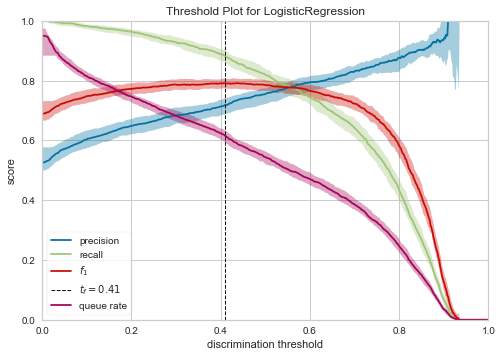

In [16]:
import warnings
warnings.filterwarnings('ignore')
logitsmote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecomchurnprediction(logitsmote,oversampling_smoteX,testX,oversampling_smoteY,testY,
                         columns,"coefficients",threshold_plot = True)

## Recursive Feature Elimination
* It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

### RFE_LogisticRegression


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1484
           1       0.73      0.56      0.63       626

    accuracy                           0.81      2110
   macro avg       0.78      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110

Accuracy   Score :  0.8071090047393364
Area under curve :  0.7363388389896919 



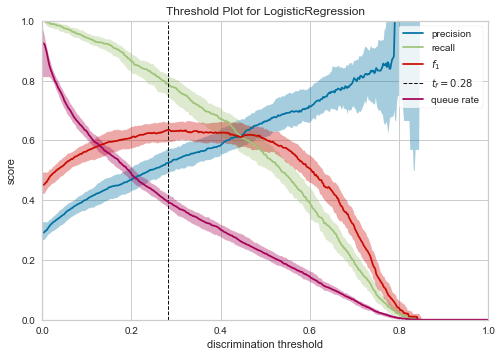

In [17]:
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

LR = LogisticRegression()

RFX = telecomdata[columns]
RFY = telecomdata[target]
rfe = RFE(LR,10)
rfe = rfe.fit(RFX,RFY.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
identifycolumns_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in telecomdata.columns if i not in Id + target],
                       "ranking" : rfe.ranking_,
                      })
cols = identifycolumns_rfe[identifycolumns_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
trainrfX = RFX[columns]
trainrfY = RFY
testrfX  = test[columns]
testrfY  = test[target]

LR_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model rfe
telecomchurnprediction(LR_rfe,trainrfX,testrfX,trainrfY,testrfY,
                         columns,"coefficients",threshold_plot = True)


table_rank = ff.create_table(identifycolumns_rfe)
py.iplot(table_rank)

### Univariate analysis
*Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

In [18]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
columns = [i for i in telecomdata.columns if i not in Id + target ]

#dataframe with non negative values
dfx = df_telecomdata_org[columns]
dfy = df_telecomdata_org[target]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(dfx,dfy)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":columns,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)


#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(numcolumns),"Numerical","Categorical")

#plot
T  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

T1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[T,T1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

scores
[2.54297062e-01 1.33482766e+02 8.18577694e+01 1.31271509e+02
 9.29483891e-02 1.47165601e+02 3.12098318e+01 2.02160070e+01
 1.35439602e+02 1.73206148e+01 1.59306111e+01 1.04979224e+02
 3.88864216e+00 8.68247305e-01 6.51465136e+00 7.11376111e+01
 3.72082851e+02 2.85475152e+02 5.16714004e+02 1.76608724e+02
 4.86223101e+02 7.66190658e+01 9.99725387e+01 4.24113152e+02
 4.47251434e+01 1.63773281e+04 3.65307468e+03 6.29630810e+05]
P - Values
[6.14065505e-001 7.08954608e-031 1.46240915e-019 2.15953960e-030
 7.60461827e-001 7.21988253e-034 2.31590182e-008 6.91717063e-006
 2.64595220e-031 3.15742928e-005 6.57073922e-005 1.23423173e-024
 4.86137123e-002 3.51440986e-001 1.06989295e-002 3.33158163e-017
 6.58713045e-083 4.81399951e-064 2.19511926e-114 2.66631661e-040
 9.45428638e-108 2.07328356e-018 1.54524820e-023 3.10584857e-094
 2.26727030e-011 0.00000000e+000 0.00000000e+000 0.00000000e+000]


### Decision Tree Visualization
Using top three numerical features

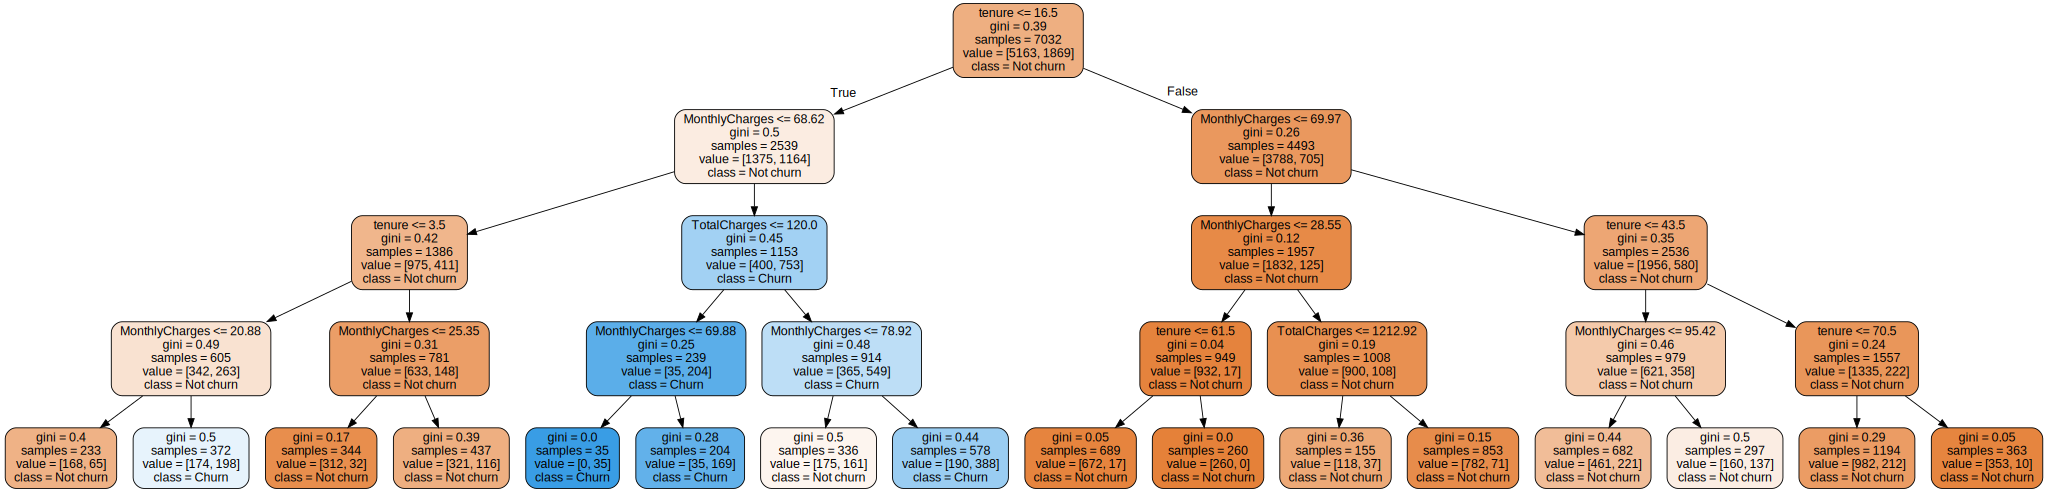

In [19]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'



#top 3 categorical features
featurescateg  = score[score["feature_type"] == "Categorical"]["features"][:4].tolist()

#top 3 numerical features
featuresnum  = score[score["feature_type"] == "Numerical"]["features"][:4].tolist()


#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plotdecisiontree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dectreex = dfx[columns]
    dectreey = dfy[target]
    
    #model
    dectree_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dectree_classifier.fit(dectreex,dectreey)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dectree_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        telecomchurnprediction(dectree_classifier, dectreex,testX[columns], dectreey,testY, columns,"features",threshold_plot = True)
    display(graph)
    
plotdecisiontree(featuresnum,4,"gini","best")



DecisionTreeClassifier(criterion='entropy', max_depth=4)

 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.85      1484
           1       0.66      0.45      0.53       626

    accuracy                           0.77      2110
   macro avg       0.73      0.67      0.69      2110
weighted avg       0.75      0.77      0.75      2110

Accuracy   Score :  0.7677725118483413
Area under curve :  0.6746628574873195 



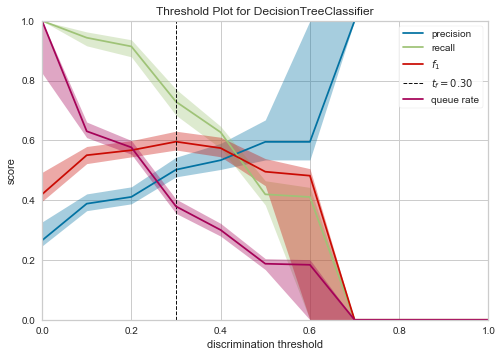

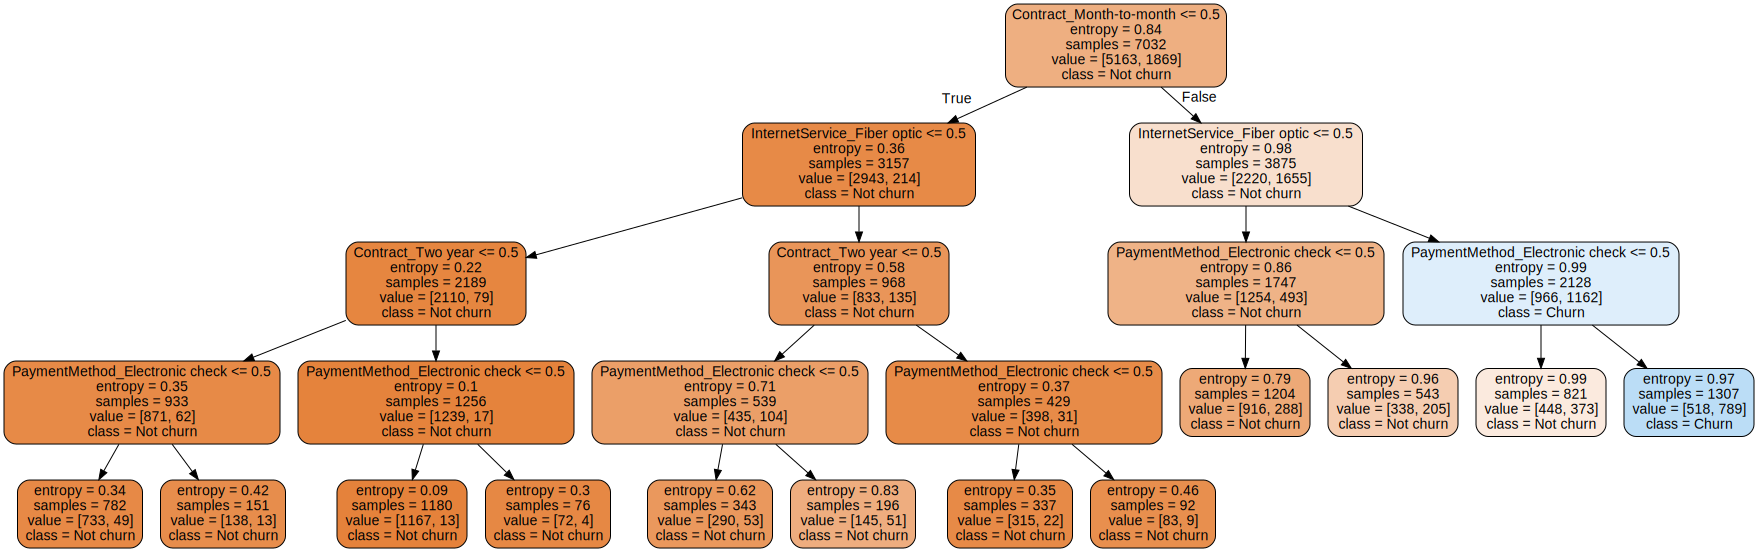

In [20]:
import warnings
warnings.filterwarnings('ignore')
##Using top three categorical features
plotdecisiontree(featurescateg,4,"entropy","best",
                   model_performance = True ,)

### KNN Classifier
*Applying knn algorithm to smote oversampled data.
### KNN_smote

KNeighborsClassifier(n_jobs=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.73      0.82      1484
           1       0.57      0.87      0.69       626

    accuracy                           0.77      2110
   macro avg       0.75      0.80      0.75      2110
weighted avg       0.82      0.77      0.78      2110

Accuracy Score   :  0.7691943127962085
Area under curve :  0.797125677083782


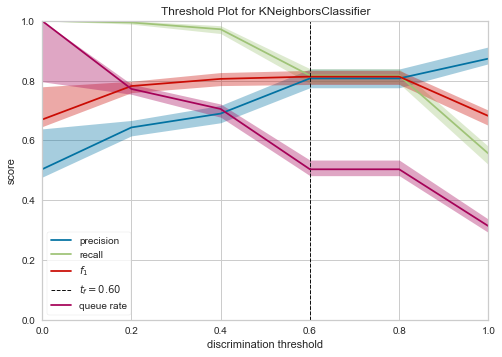

In [21]:
##KNN algorithm
def telecomchurnprediction_alg(algorithm,trainingx,testingx,
                                 trainingy,testingy,threshold_plot = True) :
    
    #model
    algorithm.fit(trainingx,trainingy)
    predictions   = algorithm.predict(testingx)
    probabilities = algorithm.predict_proba(testingx)
    
    print ( algorithm)
    print ("\n Classification report : \n",classification_report(testingy,predictions))
    print ("Accuracy Score   : ",accuracy_score(testingy,predictions))
    #confusion matrix
    confessmatrix = confusion_matrix(testingy,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testingy,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testingy,probabilities[:,1])
     
    #plot roc curve
    T1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    T2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    T3 = go.Heatmap(z = confessmatrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "greens",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [T1,T2,T3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(trainingx,trainingy)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn_smote = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

telecomchurnprediction_alg(knn_smote,oversampling_smoteX,testX, oversampling_smoteY,testY,threshold_plot = True)

### KNN_Baseline

KNeighborsClassifier(n_jobs=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1484
           1       0.61      0.49      0.54       626

    accuracy                           0.76      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.74      0.76      0.75      2110

Accuracy Score   :  0.7554502369668247
Area under curve :  0.6779094150168357


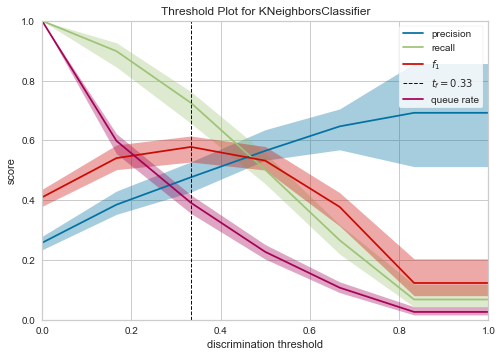

In [22]:
knn_base = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,weights='uniform')
telecomchurnprediction_alg(knn_base,trainX,testX,trainY,testY,threshold_plot = True)

### KNN_RFE

KNeighborsClassifier(n_jobs=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1484
           1       0.76      0.63      0.69       626

    accuracy                           0.83      2110
   macro avg       0.81      0.77      0.79      2110
weighted avg       0.83      0.83      0.83      2110

Accuracy Score   :  0.8308056872037914
Area under curve :  0.7739659671210699


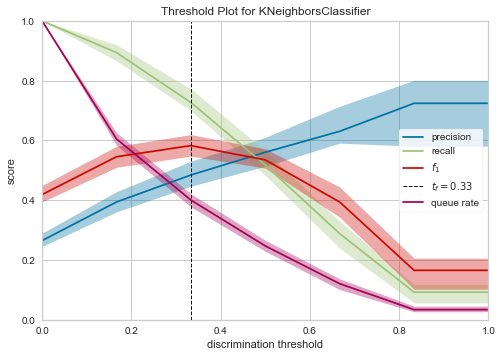

In [23]:
knn_rfe = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecomchurnprediction_alg(knn_rfe,trainrfX,testrfX,trainrfY,testrfY,threshold_plot = True)

## Random Forest Classifier
### Randomforest_RFE

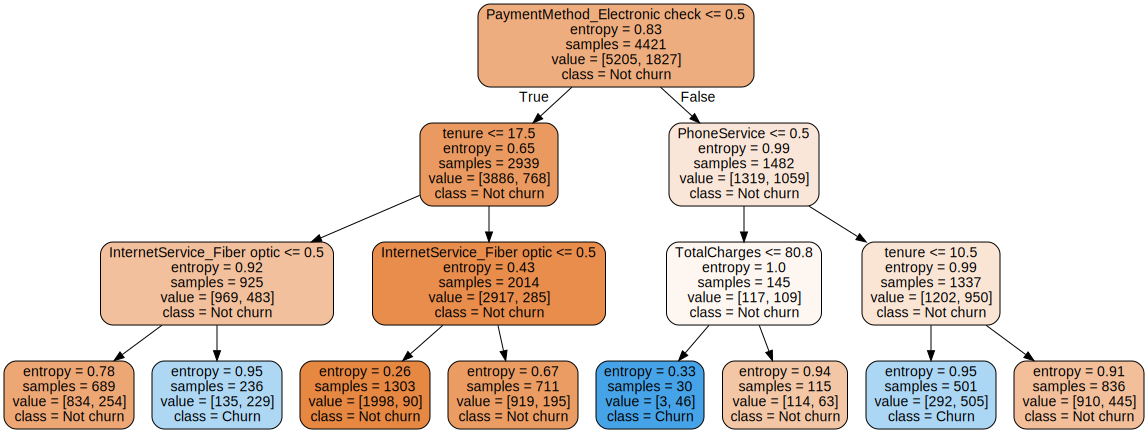

RandomForestClassifier(criterion='entropy', max_depth=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      1484
           1       0.72      0.32      0.44       626

    accuracy                           0.76      2110
   macro avg       0.75      0.63      0.65      2110
weighted avg       0.75      0.76      0.73      2110

Accuracy   Score :  0.762085308056872
Area under curve :  0.6341379399429915 



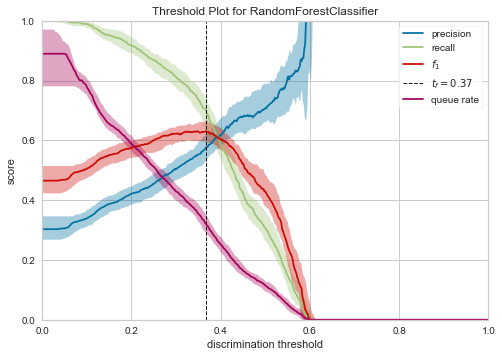

In [24]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plottreerandomforest(columns,nf_estimators, estimated_tree,maximum_depth, criterion_type,model_performance = None) :
    
    dataframeRF = df_telecomdata_org[columns + target].copy()
    
    #train and test datasets
    rfx     = dataframeRF[[i for i in columns if i not in target]]
    rfy     = dataframeRF[target]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rfx,rfy)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        telecomchurnprediction(rfc,
                                 rfx,testX[columns],
                                 rfy,testY,
                                 columns,"features",threshold_plot = True)
        

columns1 = [ i for i in trainX.columns if i not in target + Id] 
plottreerandomforest(columns1,100,99,3,"entropy",True)

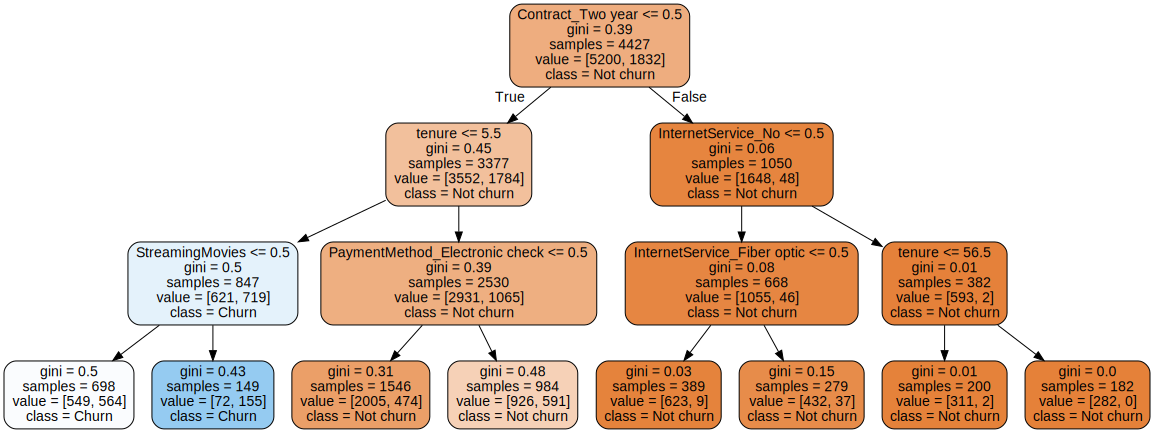

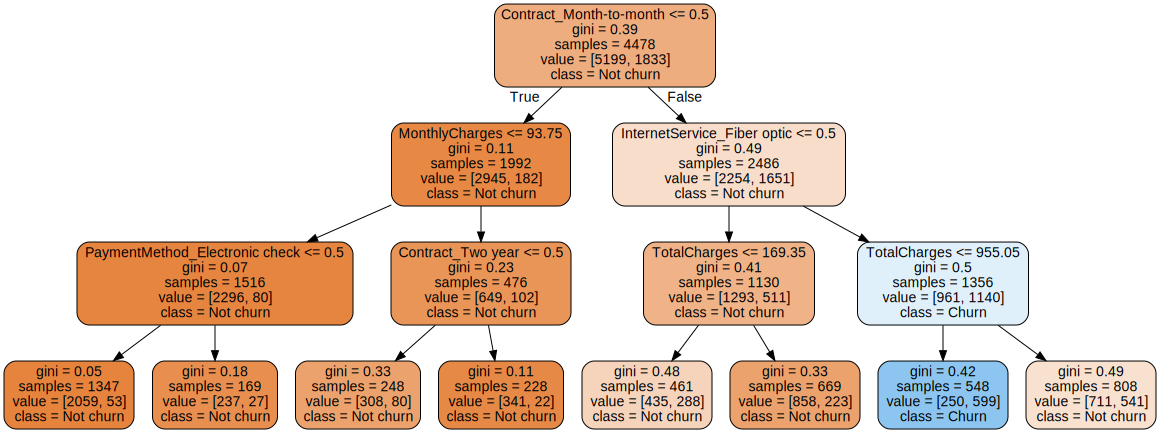

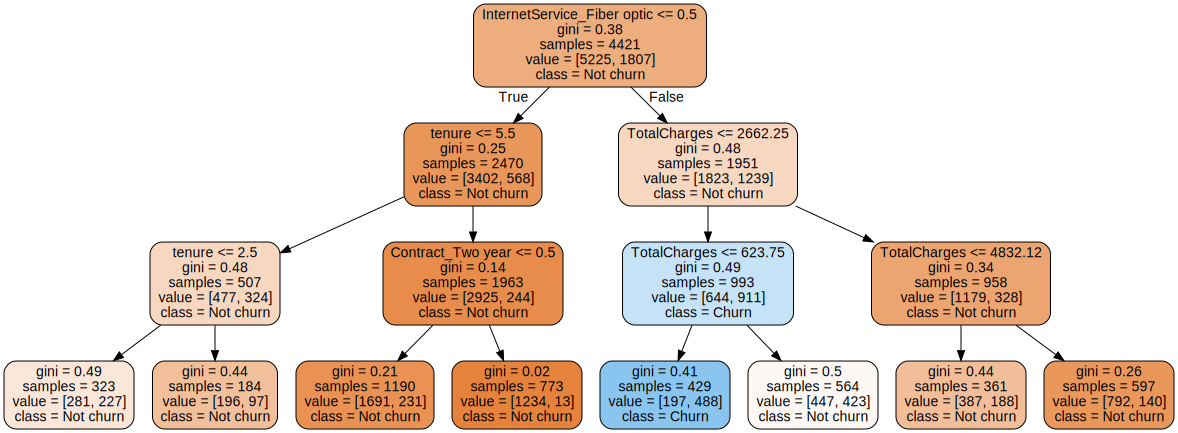

In [25]:
n = np.arange(0,3).tolist()
columns = identifycolumns_rfe[identifycolumns_rfe["rfe_support"] == True]["columns"].tolist() 
for i in n :
    plottreerandomforest(columns,3,i,3,"gini",model_performance=False)

### Gaussian Navie Bayes 
### 1. GNB_SMOTE
### 2. GNB_RFE
### 3. GNB_Baseline

GaussianNB()

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1484
           1       0.56      0.79      0.66       626

    accuracy                           0.75      2110
   macro avg       0.73      0.76      0.73      2110
weighted avg       0.79      0.75      0.76      2110

Accuracy Score   :  0.7530805687203791
Area under curve :  0.7648893845319188


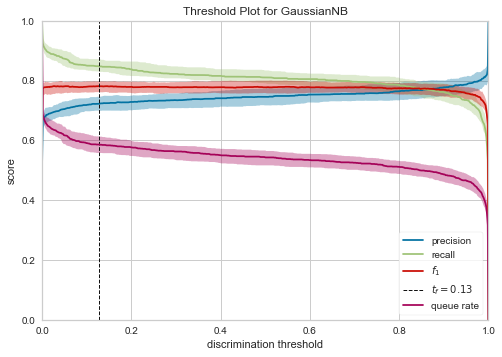

GaussianNB()

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1484
           1       0.56      0.78      0.66       626

    accuracy                           0.76      2110
   macro avg       0.73      0.76      0.73      2110
weighted avg       0.79      0.76      0.77      2110

Accuracy Score   :  0.7563981042654029
Area under curve :  0.7630917217088777


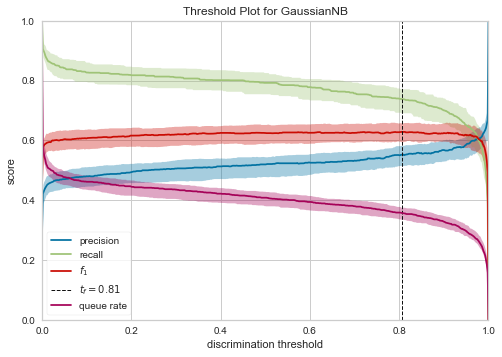

GaussianNB()

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1484
           1       0.56      0.77      0.65       626

    accuracy                           0.75      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.79      0.75      0.76      2110

Accuracy Score   :  0.7535545023696683
Area under curve :  0.7587611842615157


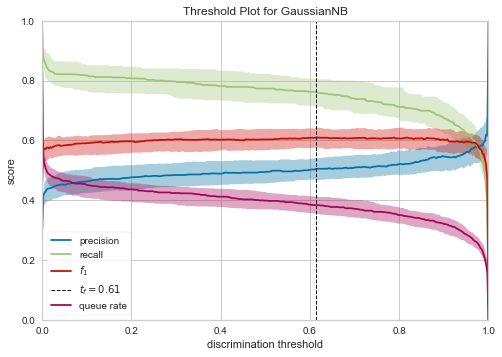

In [26]:
from sklearn.naive_bayes import GaussianNB

#applying smote method
ganaba_smote = GaussianNB(priors=None)
telecomchurnprediction_alg(ganaba_smote,oversampling_smoteX,testX,oversampling_smoteY,testY)

#applying model rfe
ganaba_rfe = GaussianNB(priors=None)
telecomchurnprediction_alg(ganaba_rfe,trainrfX,testrfX,trainrfY,testrfY)
                        
#applying baseline model
ganaba_bl = GaussianNB(priors=None)
telecomchurnprediction_alg(ganaba_bl,trainX,testX,trainY,testY)


### Support Vector Machine
### 1. SVM_SMOTE
### 2. SVM_RFE
### 3. SVM_Baseline

In [27]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
#Support vector classifier using smote
#using linear hyper plane
svclinear_smote  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

columns = [i for i in telecomdata.columns if i not in Id + target]
telecomchurnprediction(svclinear_smote,oversampling_smoteX,testX,oversampling_smoteY,testY,
                         columns,"coefficients",threshold_plot = False)

#Support vector classifier using bl
svclinear_bl  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

columns = [i for i in telecomdata.columns if i not in Id + target]
telecomchurnprediction(svclinear_bl,trainX,testX,trainY,testY,
                         columns,"coefficients",threshold_plot = False)

#Support vector classifier using rfe
svclinear_rfe  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

columns = [i for i in telecomdata.columns if i not in Id + target]
telecomchurnprediction(svclinear_rfe,trainrfX,testrfX,trainrfY,testrfY,
                         columns,"coefficients",threshold_plot = False)

SVC(gamma=1.0, kernel='linear', probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1484
           1       0.54      0.82      0.65       626

    accuracy                           0.74      2110
   macro avg       0.72      0.76      0.72      2110
weighted avg       0.79      0.74      0.75      2110

Accuracy   Score :  0.7364928909952607
Area under curve :  0.7609474436588789 



SVC(gamma=1.0, kernel='linear', probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1484
           1       0.70      0.53      0.61       626

    accuracy                           0.79      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110

Accuracy   Score :  0.7943127962085308
Area under curve :  0.718929497171103 



SVC(gamma=1.0, kernel='linear', probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1484
           1       0.70      0.56      0.62       626

    accuracy                           0.80      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy   Score :  0.7981042654028436
Area under curve :  0.7285518372759919 



In [28]:
#tuning parameters
#Support vector classifier
#using non-linear hyper plane("rbf")
#applying model smote
svcrbf_smote  = SVC(C=2.0, kernel='rbf', degree= 3, gamma=1.0, coef0=0.0, shrinking=True,probability=True,tol=0.001,
               cache_size=200, class_weight=None, verbose=False,max_iter= -1, random_state=None)
telecomchurnprediction_alg(svcrbf_smote,oversampling_smoteX,testX,oversampling_smoteY,testY,threshold_plot = False)
#applying model rfe

svcrbf_rfe  = SVC(C=2.0, kernel='rbf', degree= 3, gamma=1.0, coef0=0.0, shrinking=True,probability=True,tol=0.001,
               cache_size=200, class_weight=None, verbose=False,max_iter= -1, random_state=None)
telecomchurnprediction_alg(svcrbf_rfe,trainrfX,testrfX,trainrfY,testrfY,threshold_plot = False)
                        
#applying baseline model
svcrbf_bl  = SVC(C=2.0, kernel='rbf', degree= 3, gamma=1.0, coef0=0.0, shrinking=True,probability=True,tol=0.001,
               cache_size=200, class_weight=None, verbose=False,max_iter= -1, random_state=None)
telecomchurnprediction_alg(svcrbf_bl,trainX,testX,trainY,testY,threshold_plot = False)
                        

SVC(C=2.0, gamma=1.0, probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1484
           1       0.81      0.83      0.82       626

    accuracy                           0.89      2110
   macro avg       0.87      0.87      0.87      2110
weighted avg       0.89      0.89      0.89      2110

Accuracy Score   :  0.8919431279620853
Area under curve :  0.873306752322968


SVC(C=2.0, gamma=1.0, probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1484
           1       0.93      0.89      0.91       626

    accuracy                           0.95      2110
   macro avg       0.94      0.93      0.94      2110
weighted avg       0.95      0.95      0.95      2110

Accuracy Score   :  0.9473933649289099
Area under curve :  0.9302754406965028


SVC(C=2.0, gamma=1.0, probability=True)

 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      1484
           1       0.66      0.40      0.50       626

    accuracy                           0.76      2110
   macro avg       0.72      0.66      0.67      2110
weighted avg       0.75      0.76      0.74      2110

Accuracy Score   :  0.762085308056872
Area under curve :  0.6586130654564556


### XGBoost
### 1. XGB_SMOTE
### 2. XGB_RFE
### 3. XGB_Baseline

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1484
           1       0.89      0.85      0.87       626

    accuracy                           0.92      2110
   macro avg       0.91      0.90      0.91      2110
weighted avg       0.92      0.92      0.92      2110

Accuracy   Score :  0.9227488151658768
A

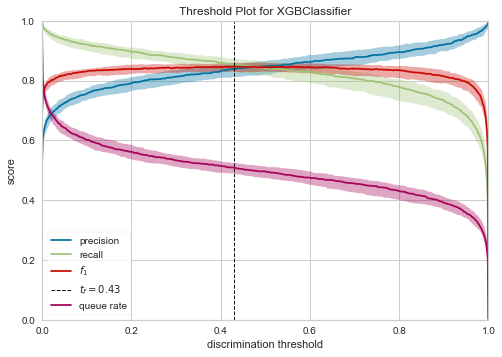

In [29]:
from xgboost import XGBClassifier
import xgboost as xgb
xgboost = xgb.XGBRegressor(random_state=42,verbosity=0)
#silent="true"
#xgboost = xgb.XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
# smote model applying
xgc_smote = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1,verbosity=0)

telecomchurnprediction(xgc_smote,oversampling_smoteX,testX,oversampling_smoteY,testY, columns,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1484
           1       0.63      0.50      0.56       626

    accuracy                           0.77      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.76      0.77      0.76      2110

Accuracy   Score :  0.76635

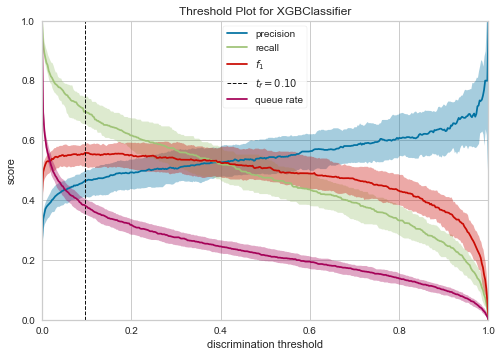

In [30]:
#xgboost baseline baseline
import xgboost as xgb
xgboost = xgb.XGBRegressor(random_state=42,verbosity=0)

xgc_bl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1, verbosity=0)
telecomchurnprediction(xgc_bl,trainX,testX,trainY,testY,cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1484
           1       1.00      0.99      0.99       626

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110

Accuracy   Score :  0.99668

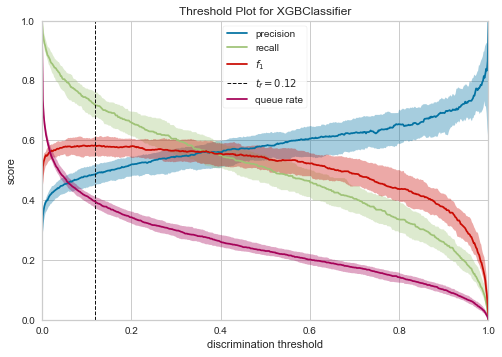

In [31]:
from xgboost import XGBClassifier
import xgboost as xgb
xgboost = xgb.XGBRegressor(random_state=42,verbosity=0)
#applying model rfe
xgc_rfe = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1,verbosity=0)
telecomchurnprediction(xgc_rfe,trainrfX,testrfX,trainrfY,testrfY,columns,"features",threshold_plot = True)

## 8.Model performances
### Model performance of SMOTE

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
#gives model report in dataframe
def model_report(model,trainingx,testingx,trainingy,testingy,name) :
    model.fit(trainingx,trainingy)
    predictions  = model.predict(testingx)
    accuracy     = accuracy_score(testingy,predictions)
    recallscore  = recall_score(testingy,predictions)
    precision    = precision_score(testingy,predictions)
    roc_auc      = roc_auc_score(testingy,predictions)
    f1score      = f1_score(testingy,predictions) 
    kappa_metric = cohen_kappa_score(testingy,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every smote model 

modelLR_SMOTE = model_report(logitsmote,oversampling_smoteX,testX,oversampling_smoteY,testY, "Log reg(SMOTE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,random_state = 123,splitter  = "best",criterion = "gini",)
modelDT_SMOTE = model_report(decision_tree,oversampling_smoteX,testX,oversampling_smoteY,testY,"Decision Tree")
modelKNN_SMOTE = model_report(knn_smote,oversampling_smoteX,testX,oversampling_smoteY,testY,"KNN Smote Classifier")
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 123, max_depth = 9,criterion = "gini")
modelRFC_SMOTE = model_report(rfc,oversampling_smoteX,testX,oversampling_smoteY,testY,"RF Classifier")
modelNB_SMOTE = model_report(ganaba_smote,oversampling_smoteX,testX,oversampling_smoteY,testY, "Naive Bayes")
modelSVCL_SMOTE = model_report(svclinear_smote,oversampling_smoteX,testX,oversampling_smoteY,testY,"SVM Classifier Linear")
modelSVCR_SMOTE = model_report(svcrbf_smote,oversampling_smoteX,testX,oversampling_smoteY,testY, "SVM Classifier RBF")
modelXG_SMOTE = model_report(xgc_smote,oversampling_smoteX,testX,oversampling_smoteY,testY, "XGBoost Classifier")

#concat all models
modelperformances_smote = pd.concat([modelLR_SMOTE,modelKNN_SMOTE,modelRFC_SMOTE,modelDT_SMOTE,
                                modelNB_SMOTE,modelSVCL_SMOTE,modelSVCR_SMOTE,modelXG_SMOTE],axis = 0).reset_index()
#modelDT_SMOTE
modelperformances_smote = modelperformances_smote.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(modelperformances_smote,4))
table.layout.width=1000
py.iplot(table)

### RFE Model performances


In [33]:
import warnings
warnings.filterwarnings('ignore')
#outputs for every RFE model

modelLR_RFE = model_report(LR_rfe,trainrfX,testrfX,trainrfY,testrfY, "LogReg(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,random_state = 123,splitter  = "best",criterion = "gini",)
modelDT_RFE = model_report(decision_tree,trainrfX,testrfX,trainrfY,testrfY,"Decision Tree(RFE)")
modelKNN_RFE = model_report(knn_rfe,trainrfX,testrfX,trainrfY,testrfY,"KNN Smote Classifier")
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 123, max_depth = 9,criterion = "gini")
modelRFC_RFE = model_report(rfc,trainrfX,testrfX,trainrfY,testrfY,"RF Classifier")
modelNB_RFE = model_report(ganaba_rfe,trainrfX,testrfX,trainrfY,testrfY, "Naive Bayes")
modelSVCL_RFE = model_report(svclinear_rfe,trainrfX,testrfX,trainrfY,testrfY,"SVM Classifier Linear")
modelSVCR_RFE = model_report(svcrbf_rfe,trainrfX,testrfX,trainrfY,testrfY, "SVM Classifier RBF")
modelXG_RFE = model_report(xgc_rfe,trainrfX,testrfX,trainrfY,testrfY, "XGBoost Classifier")

#concat all models
modelperformances_rfe = pd.concat([modelLR_RFE,modelDT_RFE,modelKNN_RFE
                        ,modelRFC_RFE,modelNB_RFE,modelSVCL_RFE,modelSVCR_RFE,modelXG_RFE],axis = 0).reset_index()
#,modelDT_RFE ,modelRFC_RFE
modelperformances_rfe = modelperformances_rfe.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(modelperformances_rfe,4))
table.layout.width=1000
py.iplot(table)


### Baseline model performances

In [34]:
import warnings
warnings.filterwarnings('ignore')

#outputs for every Baseline model
modelLR_BL = model_report(logit_bl,trainX,testX,trainY,testY, "Log Reg(BL)")
decision_tree = DecisionTreeClassifier(max_depth = 9,random_state = 123,splitter  = "best",criterion = "gini",)
modelDT_BL = model_report(decision_tree,trainX,testX,trainY,testY,"Decision Tree(BL)")
modelKNN_BL = model_report(knn_base,trainX,testX,trainY,testY,"KNN Smote Classifier(BL)")
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 123, max_depth = 9,criterion = "gini")
modelRFC_BL = model_report(rfc,trainX,testX,trainY,testY,"RF Classifier(BL)")
modelNB_BL = model_report(ganaba_bl,trainX,testX,trainY,testY, "Naive Bayes(BL)")
modelSVCL_BL = model_report(svclinear_bl,trainX,testX,trainY,testY,"SVM Linear(BL)")
modelSVCR_BL = model_report(svcrbf_bl,trainX,testX,trainY,testY, "SVM RF (BL)")
modelXG_BL = model_report(xgc_bl,trainX,testX,trainY,testY, "XGBoost Classifier(BL)")

#concat all models
modelperformances_bl = pd.concat([modelLR_BL,modelDT_BL,modelKNN_BL,modelRFC_BL,
                                modelNB_BL,modelSVCL_BL,modelSVCR_BL,modelXG_BL],axis = 0).reset_index()

modelperformances_bl = modelperformances_bl.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(modelperformances_bl,4))
table.layout.width=1000
py.iplot(table)

## 9.Model performances of following methods
### 1. SMOTE
### 2. RFE
### 3. Baseline

In [35]:
modelperformances_smote
def output_tracer(metric,color) :
    tracer = go.Bar(y = modelperformances_smote["Model"] ,
                    x = modelperformances_smote[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances using SMOTE",plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                        title = "metric",zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)', zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250), height = 780) )

T1  = output_tracer("Accuracy_score","#6699FF")
T2  = output_tracer('Recall_score',"red")
T3  = output_tracer('Precision',"#33CC99")
T4  = output_tracer('f1_score',"lightgrey")
T5  = output_tracer('Kappa_metric',"#FFCC99")

data = [T1,T2,T3,T4,T5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [36]:
modelperformances_rfe
def output_tracer(metric,color) :
    tracer = go.Bar(y = modelperformances_rfe["Model"] ,
                    x = modelperformances_rfe[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances using RFE",plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                        title = "metric",zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)', zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250), height = 780) )

T1  = output_tracer("Accuracy_score","#6699FF")
T2  = output_tracer('Recall_score',"red")
T3  = output_tracer('Precision',"#33CC99")
T4  = output_tracer('f1_score',"lightgrey")
T5  = output_tracer('Kappa_metric',"#FFCC99")

data = [T1,T2,T3,T4,T5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [37]:
modelperformances_bl
def output_tracer(metric,color) :
    tracer = go.Bar(y = modelperformances_bl["Model"] ,
                    x = modelperformances_bl[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances using BL",plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                        title = "metric",zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)', zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250), height = 780) )

T1  = output_tracer("Accuracy_score","#6699FF")
T2  = output_tracer('Recall_score',"red")
T3  = output_tracer('Precision',"#33CC99")
T4  = output_tracer('f1_score',"lightgrey")
T5  = output_tracer('Kappa_metric',"#FFCC99")

data = [T1,T2,T3,T4,T5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## 10.Confusion matrices for models

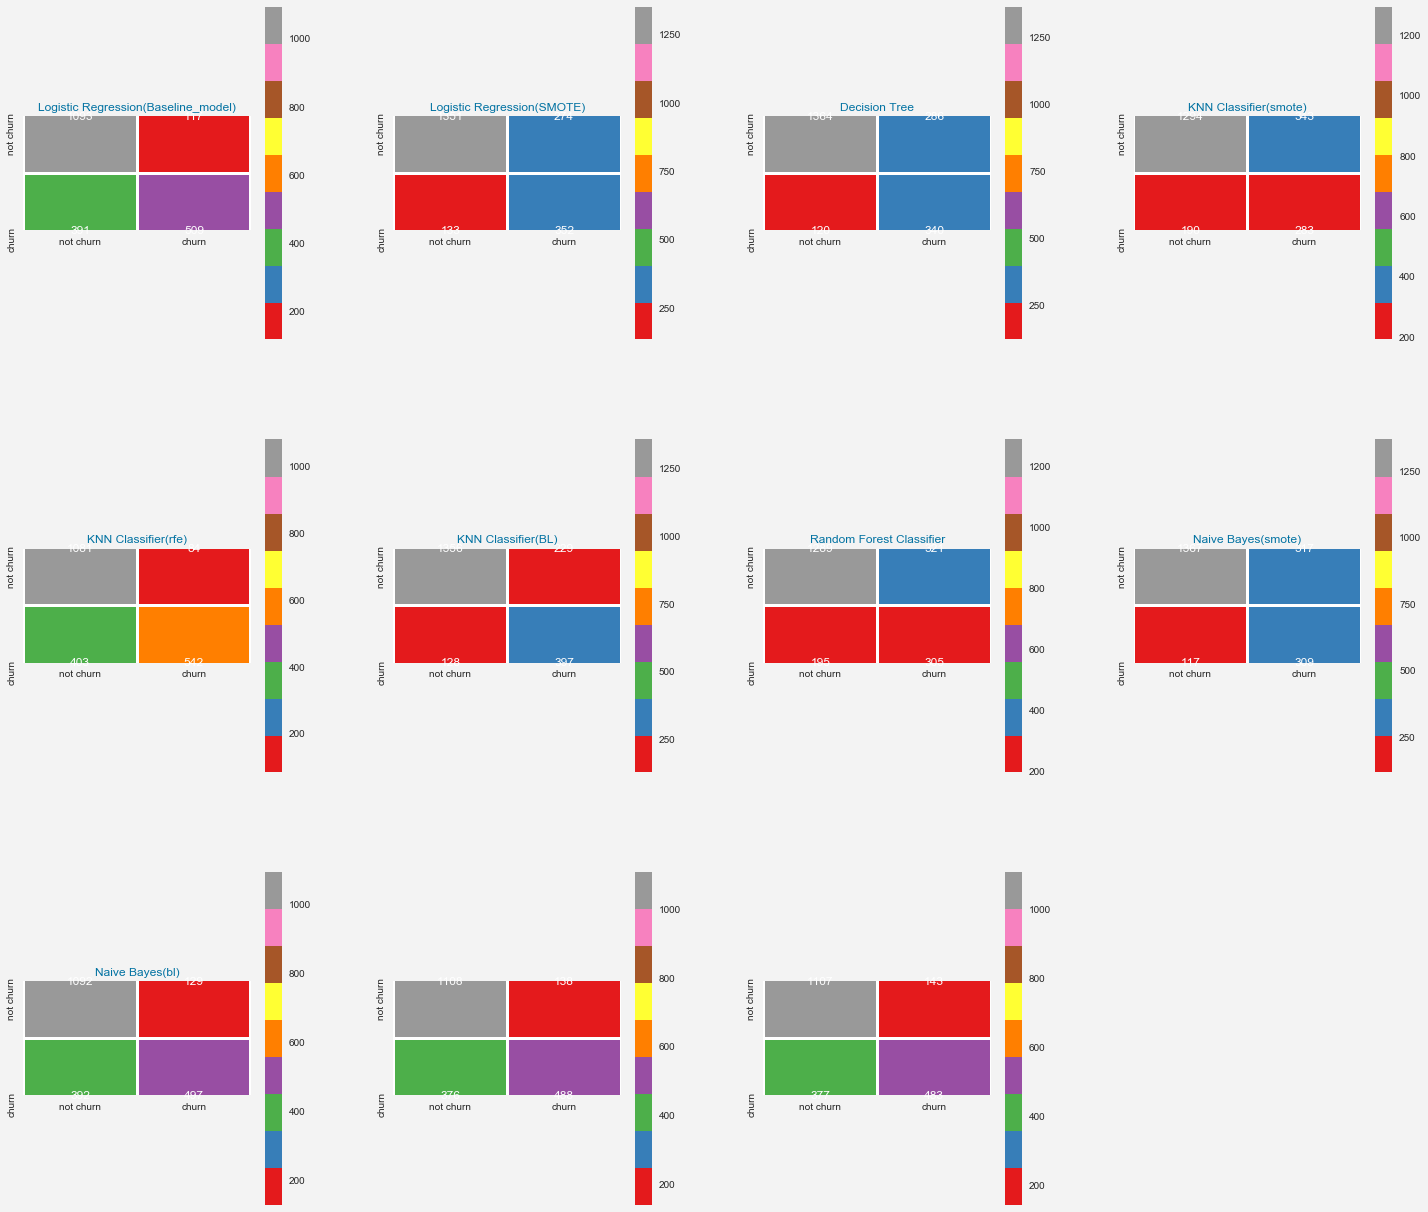

In [38]:
import warnings
warnings.filterwarnings('ignore')
lst    = [logitsmote,LR_rfe,logit_bl,decision_tree,knn_smote,knn_rfe,knn_base,rfc,ganaba_smote,ganaba_rfe,ganaba_bl]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier(smote)','KNN Classifier(rfe)','KNN Classifier(BL)','Random Forest Classifier',
          'Naive Bayes(smote)','Naive Bayes(bl)']

fig = plt.figure(figsize=(25,30))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,4,j+1)
    predictions = i.predict(testX)
    conf_matrix = confusion_matrix(predictions,testY)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)
    
   

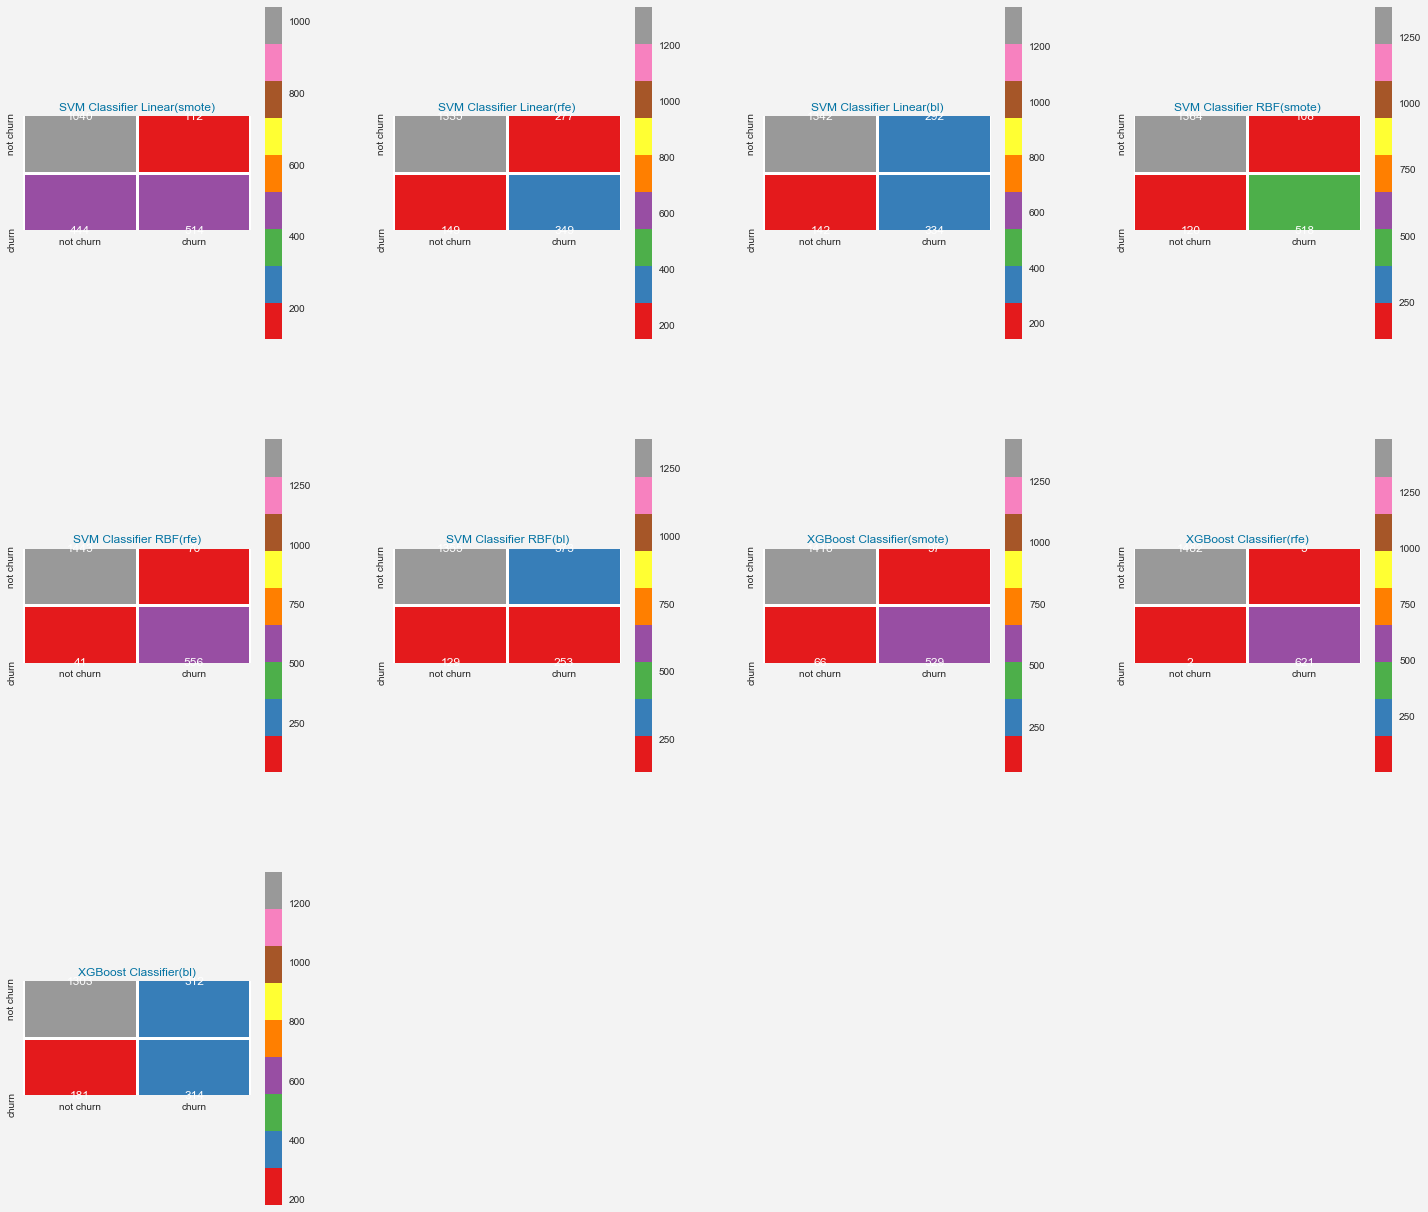

In [39]:
import warnings
warnings.filterwarnings('ignore')
lst    = [ svclinear_smote,svclinear_rfe,svclinear_bl,svcrbf_smote,svcrbf_rfe,svcrbf_bl,xgc_smote,xgc_rfe,
          xgc_bl]

length = len(lst)

mods   = ['SVM Classifier Linear(smote)','SVM Classifier Linear(rfe)','SVM Classifier Linear(bl)','SVM Classifier RBF(smote)', 
          'SVM Classifier RBF(rfe)','SVM Classifier RBF(bl)','XGBoost Classifier(smote)','XGBoost Classifier(rfe)',
         'XGBoost Classifier(bl)']

fig = plt.figure(figsize=(25,30))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,4,j+1)
    predictions = i.predict(testX)
    conf_matrix = confusion_matrix(predictions,testY)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)
    
   